In [1]:
import pandas as pd 
df=pd.read_csv("dataset_small.csv")


In [2]:
import warnings  
warnings.filterwarnings("ignore")  
  
import pandas as pd  
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None) 
 
 

import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import MinMaxScaler 

In [3]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.334573,0,8560,4927,185,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,32,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,1.326223,-1,263283,8217,-1,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,23,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,3.969207,1,26496,258,106,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,38,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,25,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.495212,1,20013,2602,319,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,46,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.177876,-1,41828,-1,-1,1,2,1,389,1,1,0,0,0,1


In [4]:
df.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

In [5]:
# Check the number of unique values of each column


## Dataset Information

- **Dataset Name**: Phishing Detection Dataset
- **Number of Instances**: [Number of rows in your dataset]
- **Number of Features**: 1112
- **Dataset Description**: This dataset contains features related to URLs and domains, along with a target variable indicating whether each URL is phishing or not.

### Features

1. **qty_dot_url**: Quantity of dots in the URL.
2. **qty_hyphen_url**: Quantity of hyphens in the URL.
3. **qty_underline_url**: Quantity of underscores in the URL.
   ...
   [Add descriptions for all 1112 features]

### Target Variable

- **phishing**: Label indicating whether the URL is phishing (1) or not (0).

### Data Types

- **Data Types of Features**: [Provide the data types of each feature, e.g., numerical, categorical]


In [6]:
types=df.dtypes
types

qty_dot_url                     int64
qty_hyphen_url                  int64
qty_underline_url               int64
qty_slash_url                   int64
qty_questionmark_url            int64
qty_equal_url                   int64
qty_at_url                      int64
qty_and_url                     int64
qty_exclamation_url             int64
qty_space_url                   int64
qty_tilde_url                   int64
qty_comma_url                   int64
qty_plus_url                    int64
qty_asterisk_url                int64
qty_hashtag_url                 int64
qty_dollar_url                  int64
qty_percent_url                 int64
qty_tld_url                     int64
length_url                      int64
qty_dot_domain                  int64
qty_hyphen_domain               int64
qty_underline_domain            int64
qty_slash_domain                int64
qty_questionmark_domain         int64
qty_equal_domain                int64
qty_at_domain                   int64
qty_and_doma

In [7]:
#missingh values 
df.isna().sum()

qty_dot_url                   0
qty_hyphen_url                0
qty_underline_url             0
qty_slash_url                 0
qty_questionmark_url          0
qty_equal_url                 0
qty_at_url                    0
qty_and_url                   0
qty_exclamation_url           0
qty_space_url                 0
qty_tilde_url                 0
qty_comma_url                 0
qty_plus_url                  0
qty_asterisk_url              0
qty_hashtag_url               0
qty_dollar_url                0
qty_percent_url               0
qty_tld_url                   0
length_url                    0
qty_dot_domain                0
qty_hyphen_domain             0
qty_underline_domain          0
qty_slash_domain              0
qty_questionmark_domain       0
qty_equal_domain              0
qty_at_domain                 0
qty_and_domain                0
qty_exclamation_domain        0
qty_space_domain              0
qty_tilde_domain              0
qty_comma_domain              0
qty_plus

In [8]:
#duplicates 
df.duplicated().sum()

1240

In [9]:
df.drop_duplicates(inplace=True)


In [10]:
df.shape

(57405, 112)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57405 entries, 0 to 58644
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 49.5 MB


In [12]:
print(type(df))


<class 'pandas.core.frame.DataFrame'>


In [13]:
df["phishing"].value_counts()

phishing
1    30497
0    26908
Name: count, dtype: int64

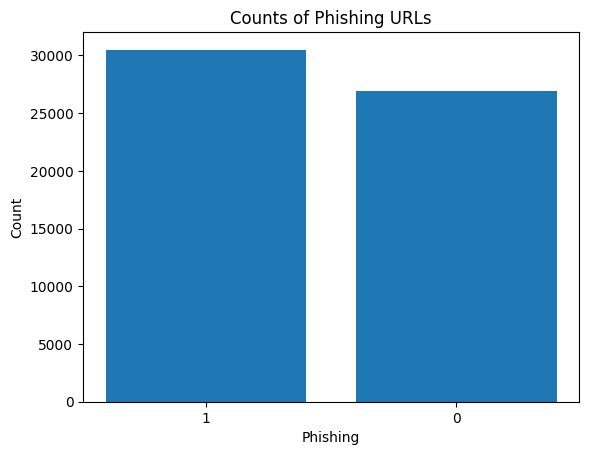

In [14]:
import matplotlib.pyplot as plt

# Assuming 'counts' is your Series
counts = pd.Series([30497, 26908], index=[1, 0])

# Create a bar plot
plt.bar(counts.index.astype(str), counts.values)

# Add labels and title
plt.xlabel('Phishing')
plt.ylabel('Count')
plt.title('Counts of Phishing URLs')

# Show the plot
plt.show()


## Counts of Phishing URLs

| Phishing | Count |
|----------|-------|
| 1        | 30497 |
| 0        | 26908 |


In [15]:
df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.0,57405.0,57405.0,57405.000000,57405.0,57405.0,57405.0,57405.0,57405.0,57405.0,57405.0,57405.0,57405.0,57405.0,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.00000,57405.000000,57405.0000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000,57405.000000
mean,2.290863,0.462904,0.174218,1.963836,0.013797,0.314119,0.034004,0.215591,0.004547,0.001568,0.004982,0.002404,0.004251,0.007003,0.000784,0.002927,0.164742,1.069767,45.266371,1.799303,0.134344,0.000296,0.0,0.0,0.0,0.000017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.451389,18.092553,0.003379,0.003589,0.037732,-0.018866,-0.198572,1.627071,-0.287762,-0.276875,-0.282536,-0.280794,-0.285254,-0.286543,-0.282867,-0.286874,-0.286107,-0.282049,-0.287762,-0.285742,-0.206724,17.149673,-0.030625,-0.198467,-0.249090,-0.287762,-0.287762,-0.285219,-0.287309,-0.285567,-0.286160,-0.28710,-0.287309,-0.2871,-0.286578,-0.285951,-0.287762,-0.287762,-0.230328,4.757408,-0.710722,-0.814302,-0.788799,-0.828935,-

In [16]:
df.corr()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
qty_dot_url,1.000000,0.097133,0.119083,0.225155,0.424396,0.505161,0.168627,0.561035,0.001527,-0.001587,0.025199,0.040483,0.017789,-0.003200,0.000908,0.010173,0.054067,0.413837,0.453929,0.457752,0.034975,0.001796,NaN,NaN,NaN,0.001999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.148008,0.275957,0.055671,0.019694,0.440286,0.081880,0.105418,0.186264,0.114331,0.114873,0.095974,0.106797,0.110280,0.111359,0.115892,0.114422,0.111804,0.087188,0.114331,0.109209,0.032591,0.187632,0.325731,0.072575,0.095636,0.114331,0.114331,0.114299,0.114576,0.119474,0.111792,0.112228,0.113922,0.114224,0.112418,0.095641,0.114331,0.114331,0.026684,0.098210,0.726434,0.235692,0.240640,0.301322,0.456108,0.494290,0.411505,0.582872,0.358771,0.360818,0.361785,0.358362,0.351134,0.360977,0.361554,0.362186,0.174123,0.401631,0.422816,0.415441,0.336686,0.006279,-0.005885,0.001896,-0.027826,-0.060588,-0.063670,-0.028623,-0.051102,0.048451,-0.072265,-0.058051,-0.006452,-0.004562,-0.067729,0.136258
qty_hyphen_url,0.097133,1.000000,0.200845,0.264366,0.050686,0.154437,0.033232,0.112895,0.014640,0.016904,0.003403,0.022287,0.008345,0.000788,0.002890,0.011888,0.024944,0.118723,0.380406,-0.001243,0.357185,-0.005070,NaN,NaN,NaN,-0.001430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101594,0.137846,-0.013066,0.040466,0.167307,0.769853,0.167015,0.248803,0.169790,0.172835,0.146126,0.151703,0.167444,0.168534,0.165301,0.170270,0.165292,0.131325,0.169790,0.162748,0.039676,0.369491,0.167089,0.536138,0.156702,0.169790,0.169790,0.171435,0.169793,0.173070,0.169460,0.169225,0.169336,0.169567,0.166128,0.144298,0.169790,0.169790,0.042448,0.261528,0.091006,0.450239,0.209767,0.145346,0.140118,0.158255,0.130110,0.133990,0.142144,0.142631,0.141782,0.140143,0.137617,0.142275,0.141406,0.144331,0.078581,0.218015,0.141477,0.173525,0.055560,-0.008800,0.005428,-0.009749,-0.058827,0.001005,0.042832,0.033007,-0.012883,-0.025106,0.015210,0.008468,-0.004207,0.011202,-0.019842,0.136466
qty_underline_url,0.119083,0.200845,1.000000,0.215049,0.062071,0.322642,0.050404,0.246692,0.059885,-0.002072,0.037345,0.027144,0.025446,0.013796,0.006795,

In [17]:
object_features=[col for col in df.columns if df[col].dtype=="O"]  
print(object_features)  

[]


In [18]:
X=df.iloc[:,:-1]  
y=df.iloc[:,-1:]  

In [19]:
X

KeyboardInterrupt: 

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest
selector_cont = SelectKBest(score_func = f_classif, k=15)
selector_cont.fit(X, y)
e=pd.DataFrame({'Features':X.columns, 'F-Score':selector_cont.scores_, 'p-value':selector_cont.pvalues_})

In [ ]:
r=df.nunique()
r

qty_dot_url                      23
qty_hyphen_url                   30
qty_underline_url                22
qty_slash_url                    25
qty_questionmark_url              6
qty_equal_url                    20
qty_at_url                       15
qty_and_url                      21
qty_exclamation_url              10
qty_space_url                     8
qty_tilde_url                     6
qty_comma_url                     8
qty_plus_url                     10
qty_asterisk_url                 18
qty_hashtag_url                   7
qty_dollar_url                   10
qty_percent_url                  52
qty_tld_url                       9
length_url                      453
qty_dot_domain                   19
qty_hyphen_domain                12
qty_underline_domain              3
qty_slash_domain                  1
qty_questionmark_domain           1
qty_equal_domain                  1
qty_at_domain                     2
qty_and_domain                    1
qty_exclamation_domain      

In [ ]:
scaler=MinMaxScaler()  
scaler.fit(X.values)  
X_scaled=scaler.transform(X.values)  
print(X_scaled)  


[[0.04347826 0.         0.         ... 0.5        0.5        0.        ]
 [0.13043478 0.         0.         ... 0.5        0.5        0.        ]
 [0.         0.         0.         ... 0.5        0.5        0.        ]
 ...
 [0.17391304 0.17142857 0.14285714 ... 0.5        0.5        0.        ]
 [0.04347826 0.         0.         ... 0.5        0.5        0.        ]
 [0.04347826 0.         0.         ... 0.5        0.5        0.        ]]


In [ ]:
import pickle  

# Assuming 'scaler' is your scaler object
with open(file="scaler.pkl", mode="wb") as file:  
    pickle.dump(obj=scaler, file=file)  # Corrected parameter name 'file'


In [ ]:
new_X=pd.DataFrame(data=X_scaled,columns=X.columns)  
new_X.head()  


,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
0,0.043478,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.002403,0.095238,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049180,0.044053,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.00,0.0,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033870,0.5,0.021632,0.277228,0.008239,0.08,0.250,0.10,0.041655,0.0,0.055556,0.5,0.5,0.0
1,0.130435,0.000000,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.008171,0.190476,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.163934,0.123348,0.0,0.0,0.05,0.041667,0.055556,0.130435,1.0,0.166667,0.022727,0.037037,0.1,0.1,0.166667,0.166667,0.05,0.016393,1.0,0.090909,0.005714,0.005439,0.076923,0.045455,0.055556,1.0,1.0,0.25,0.333333,0.25,0.2,0.1,0.2,0.166667,0.05,0.016393,1.0,1.0,0.005714,0.000811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059038,0.0,0.665270,0.462309,0.000000,0.08,0.250,0.05,0.046041,1.0,0.055556,0.5,0.5,0.0
2,0.000000,0.000000,0.0,0.022727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.004807,0.047619,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114754,0.083700,0.0,0.0,0.05,0.041667,0.055556,0.086957,1.0,0.166667,0.022727,0.037037,0.1,0.1,0.166667,0.166667,0.05,0.016393,1.0,0.090909,0.005714,0.001554,0.076923,0.045455,0.055556,1.0,1.0,0.25,0.333333,0.25,0.2,0.1,0.2,0.166667,0.05,0.016393,1.0,1.0,0.005714,0.000811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126114,1.0,0.066953,0.014570,0.004740,0.08,0.125,0.05,0.124871,0.0,0.055556,0.5,0.5,0.0
3,0.043478,0.000000,0.0,0.068182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.008171,0.095238,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114754,0.092511,0.0,0.0,0.0

In [ ]:
new_X.shape

(57405, 111)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(new_X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)  
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape) 

(45924, 111) (45924, 1) (11481, 111) (11481, 1)


In [ ]:
y_train.head()  

,phishing
42079,0
11361,0
50874,1
18808,1
56686,1


In [ ]:
def model_selection(X_train, y_train, X_test, y_test, models):
    
    from sklearn.metrics import accuracy_score, precision_score
    
    accuracy_result = []
    precission_result = []
    str_models = []
    
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        precission = precision_score(y_test, y_pred,average='micro')
        accuracy = accuracy_score(y_test, y_pred)       
        accuracy_result.append(accuracy)
        precission_result.append(precission)  
        str_models.append(str(model))
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))

    ax1.plot(accuracy_result)
    ax1.set_ylabel('accuracy_score')

    ax2.plot(str_models,precission_result)
    ax2.set_ylabel('precission_result')
    ax2.set_xticklabels(str_models, rotation=90)
    plt.tight_layout()
    
    return pd.DataFrame({'models':models, 'accuracy':accuracy_result, 'precission':precission_result}) 


In [ ]:

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier



In [ ]:
models = [LogisticRegression(), RidgeClassifier(alpha=0.005), LinearSVC(), SVC(), KNeighborsClassifier(n_neighbors=5),
          RadiusNeighborsClassifier(radius=1.0, outlier_label=-1), DecisionTreeClassifier(), RandomForestClassifier(),
          AdaBoostClassifier(), MLPClassifier()]

,models,accuracy,precission
0,LogisticRegression(),0.890341,0.890341
1,RidgeClassifier(alpha=0.005),0.876317,0.876317
2,LinearSVC(),0.895567,0.895567
3,SVC(),0.891560,0.891560
4,KNeighborsClassifier(),0.933281,0.933281
5,RadiusNeighborsClassifier(outlier_label=-1),0.790001,0.790001
6,DecisionTreeClassifier(),0.928752,0.928752
7,"(DecisionTreeClassifier(max_features='sqrt', r...",0.955927,0.955927
8,"(DecisionTreeClassifier(max_depth=1, random_st...",0.904102,0.904102
9,MLPClassifier(),0.936330,0.936330


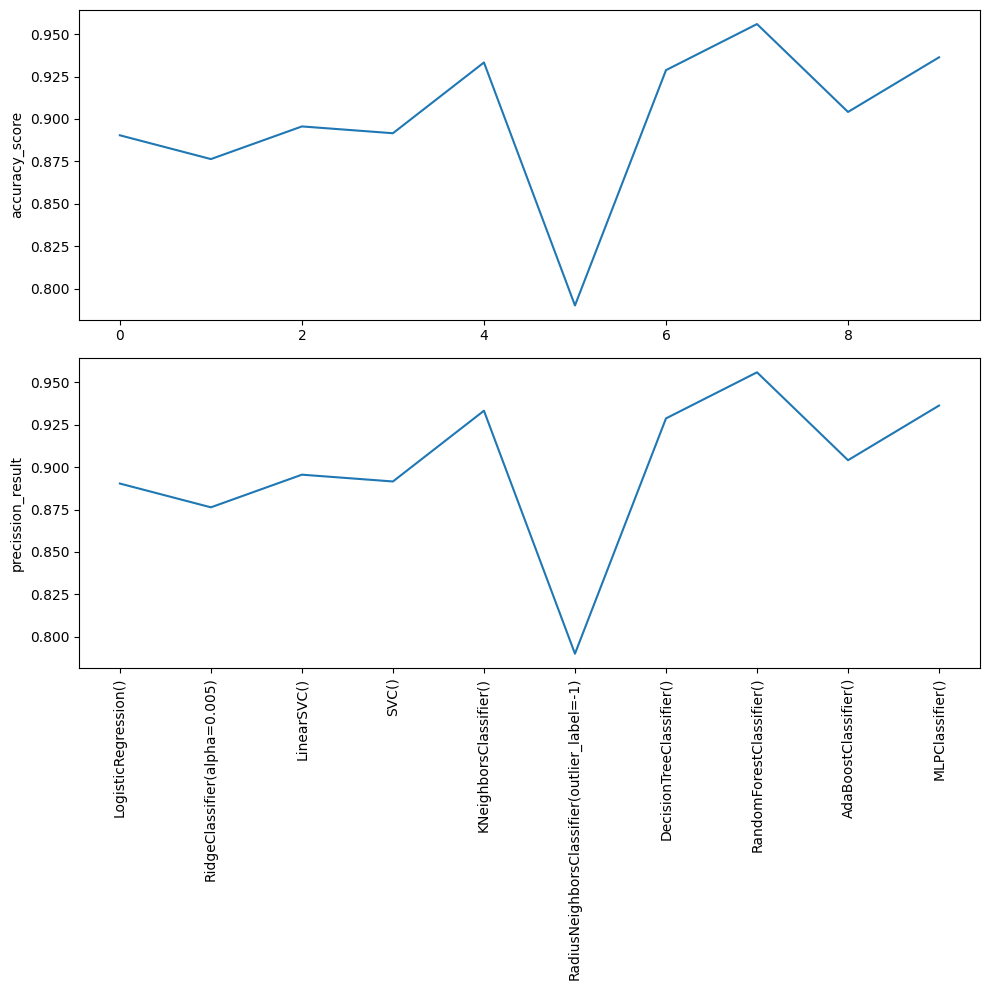

In [ ]:
model_selection(X_train, y_train, X_test, y_test, models)

In [ ]:
from urllib.parse import urlparse

def extract_qty_space_domain(url):
    parsed_url = urlparse(url)
    domain = parsed_url.netloc  # Extracting the domain part of the URL
    qty_space_domain = domain.count(' ')
    return qty_space_domain

# Example usage:
url = "https://www.example.com/path/to/resource"
qty_space = extract_qty_space_domain(url)
print("Qty of spaces in domain:", qty_space)

Qty of spaces in domain: 0


In [ ]:
import re
import urllib.parse
import socket
import whois
import time

def extract_features(url):
    features = {}
    
    # URL parsing
    parsed_url = urllib.parse.urlparse(url)
    features['length_url'] = len(url)
    features['qty_dot_url'] = url.count('.')
    features['qty_hyphen_url'] = url.count('-')
    features['qty_underline_url'] = url.count('_')
    features['qty_slash_url'] = url.count('/')
    features['qty_questionmark_url'] = url.count('?')
    features['qty_equal_url'] = url.count('=')
    features['qty_at_url'] = url.count('@')
    features['qty_and_url'] = url.count('&')
    features['qty_exclamation_url'] = url.count('!')
    features['qty_space_url'] = url.count(' ')
    features['qty_tilde_url'] = url.count('~')
    features['qty_comma_url'] = url.count(',')
    features['qty_plus_url'] = url.count('+')
    features['qty_asterisk_url'] = url.count('*')
    features['qty_hashtag_url'] = url.count('#')
    features['qty_dollar_url'] = url.count('$')
    features['qty_percent_url'] = url.count('%')
    
    # Domain parsing
    domain = parsed_url.netloc
    features['qty_dot_domain'] = domain.count('.')
    features['qty_hyphen_domain'] = domain.count('-')
    features['qty_underline_domain'] = domain.count('_')
    features['qty_slash_domain'] = domain.count('/')
    features['qty_questionmark_domain'] = domain.count('?')
    features['qty_equal_domain'] = domain.count('=')
    features['qty_at_domain'] = domain.count('@')
    features['qty_and_domain'] = domain.count('&')
    features['qty_exclamation_domain'] = domain.count('!')
    features['qty_space_domain'] = domain.count(' ')
    features['qty_tilde_domain'] = domain.count('~')
    features['qty_comma_domain'] = domain.count(',')
    features['qty_plus_domain'] = domain.count('+')
    features['qty_asterisk_domain'] = domain.count('*')
    features['qty_hashtag_domain'] = domain.count('#')
    features['qty_dollar_domain'] = domain.count('$')
    features['qty_percent_domain'] = domain.count('%')
    features['domain_length'] = len(domain)
    
    # Check if domain resolves to an IP
    try:
        ip_address = socket.gethostbyname(domain)
        features['domain_in_ip'] = 1
    except socket.error:
        ip_address = None
        features['domain_in_ip'] = 0
        
    # Check if domain is present in URL
    features['server_client_domain'] = 1 if domain in url else 0
    
    # Extract TLD
    tld = domain.split('.')[-1]
    features['qty_tld_url'] = 1 if tld else 0
    
    # Extract directory
    directory = parsed_url.path
    features['qty_dot_directory'] = directory.count('.')
    features['qty_hyphen_directory'] = directory.count('-')
    features['qty_underline_directory'] = directory.count('_')
    features['qty_slash_directory'] = directory.count('/')
    features['qty_questionmark_directory'] = directory.count('?')
    features['qty_equal_directory'] = directory.count('=')
    features['qty_at_directory'] = directory.count('@')
    features['qty_and_directory'] = directory.count('&')
    features['qty_exclamation_directory'] = directory.count('!')
    features['qty_space_directory'] = directory.count(' ')
    features['qty_tilde_directory'] = directory.count('~')
    features['qty_comma_directory'] = directory.count(',')
    features['qty_plus_directory'] = directory.count('+')
    features['qty_asterisk_directory'] = directory.count('*')
    features['qty_hashtag_directory'] = directory.count('#')
    features['qty_dollar_directory'] = directory.count('$')
    features['qty_percent_directory'] = directory.count('%')
    features['directory_length'] = len(directory)
    
    # Extract filename
    filename = parsed_url.path.split('/')[-1]
    features['qty_dot_file'] = filename.count('.')
    features['qty_hyphen_file'] = filename.count('-')
    features['qty_underline_file'] = filename.count('_')
    features['qty_slash_file'] = filename.count('/')
    features['qty_questionmark_file'] = filename.count('?')
    features['qty_equal_file'] = filename.count('=')
    features['qty_at_file'] = filename.count('@')
    features['qty_and_file'] = filename.count('&')
    features['qty_exclamation_file'] = filename.count('!')
    features['qty_space_file'] = filename.count(' ')
    features['qty_tilde_file'] = filename.count('~')
    features['qty_comma_file'] = filename.count(',')
    features['qty_plus_file'] = filename.count('+')
    features['qty_asterisk_file'] = filename.count('*')
    features['qty_hashtag_file'] = filename.count('#')
    features['qty_dollar_file'] = filename.count('$')
    features['qty_percent_file'] = filename.count('%')
    features['file_length'] = len(filename)
    
    # Extract parameters
    parameters = parsed_url.query
    features['qty_dot_params'] = parameters.count('.')
    features['qty_hyphen_params'] = parameters.count('-')
    features['qty_underline_params'] = parameters.count('_')
    features['qty_slash_params'] = parameters.count('/')
    features['qty_questionmark_params'] = parameters.count('?')
    features['qty_equal_params'] = parameters.count('=')
    features['qty_at_params'] = parameters.count('@')
    features['qty_and_params'] = parameters.count('&')
    features['qty_exclamation_params'] = parameters.count('!')
    features['qty_space_params'] = parameters.count(' ')
    features['qty_tilde_params'] = parameters.count('~')
    features['qty_comma_params'] = parameters.count(',')
    features['qty_plus_params'] = parameters.count('+')
    features['qty_asterisk_params'] = parameters.count('*')
    features['qty_hashtag_params'] = parameters.count('#')
    features['qty_dollar_params'] = parameters.count('$')
    features['qty_percent_params'] = parameters.count('%')
    features['params_length'] = len(parameters)
    features['tld_present_params'] = 1 if tld in parameters else 0
    
    # Check if email present in URL
    features['qty_params'] = parameters.count('@')
    features['email_in_url'] = 1 if '@' in url else 0
    
    # Response time
    start_time = time.time()
    response = urllib.request.urlopen(url)
    end_time = time.time()
    features['time_response'] = end_time - start_time
    
    # SPF record of domain
    try:
        spf_record = whois.whois(domain).get('spf', None)
        features['domain_spf'] = 1 if spf_record else 0
    except Exception:
        features['domain_spf'] = 0
    
    return features




In [ ]:
extract_features("https://pypi.org/project/python-whois/")

{'length_url': 38,
 'qty_dot_url': 1,
 'qty_hyphen_url': 1,
 'qty_underline_url': 0,
 'qty_slash_url': 5,
 'qty_questionmark_url': 0,
 'qty_equal_url': 0,
 'qty_at_url': 0,
 'qty_and_url': 0,
 'qty_exclamation_url': 0,
 'qty_space_url': 0,
 'qty_tilde_url': 0,
 'qty_comma_url': 0,
 'qty_plus_url': 0,
 'qty_asterisk_url': 0,
 'qty_hashtag_url': 0,
 'qty_dollar_url': 0,
 'qty_percent_url': 0,
 'qty_dot_domain': 1,
 'qty_hyphen_domain': 0,
 'qty_underline_domain': 0,
 'qty_slash_domain': 0,
 'qty_questionmark_domain': 0,
 'qty_equal_domain': 0,
 'qty_at_domain': 0,
 'qty_and_domain': 0,
 'qty_exclamation_domain': 0,
 'qty_space_domain': 0,
 'qty_tilde_domain': 0,
 'qty_comma_domain': 0,
 'qty_plus_domain': 0,
 'qty_asterisk_domain': 0,
 'qty_hashtag_domain': 0,
 'qty_dollar_domain': 0,
 'qty_percent_domain': 0,
 'domain_length': 8,
 'domain_in_ip': 1,
 'server_client_domain': 1,
 'qty_tld_url': 1,
 'qty_dot_directory': 0,
 'qty_hyphen_directory': 1,
 'qty_underline_directory': 0,
 'qty_sl

To create a website where a URL is given as input, and then use the `extract_features` function to extract features from the URL and predict whether it is a phishing website or not, you can follow these steps:

1. Set up a web application framework such as Flask or Django.
2. Create a form where users can input a URL.
3. Use the `extract_features` function to extract features from the provided URL.
4. Feed the extracted features into a machine learning model trained to predict phishing websites.
5. Display the prediction result on the website.

Here's a basic example using Flask:

```python
from flask import Flask, render_template, request
import re
import urllib.parse
import socket
import whois
import time
import pickle

# Load the machine learning model
with open('phishing_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

app = Flask(__name__)

def extract_features(url):
    # Your implementation of the extract_features function here
    pass

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    url = request.form['url']
    features = extract_features(url)
    
    # Predict using the loaded machine learning model
    prediction = model.predict([list(features.values())])
    
    return render_template('result.html', url=url, prediction=prediction[0])

if __name__ == '__main__':
    app.run(debug=True)
```

Then you would need to create two HTML templates, `index.html` and `result.html`, to handle the input form and display the prediction result respectively.

`index.html`:
```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Phishing Website Detector</title>
</head>
<body>
    <h1>Phishing Website Detector</h1>
    <form action="/predict" method="post">
        <label for="url">Enter URL:</label>
        <input type="text" id="url" name="url" required>
        <button type="submit">Check</button>
    </form>
</body>
</html>
```

`result.html`:
```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Result</title>
</head>
<body>
    <h1>Result</h1>
    <p>URL: {{ url }}</p>
    <p>Prediction: {{ prediction }}</p>
</body>
</html>
```

Make sure to have the machine learning model (`phishing_model.pkl`) trained beforehand and available in your project directory. Additionally, you need to implement the `extract_features` function according to your requirements and model input specifications.

from flask import Flask, render_template, request
import re
import urllib.parse
import socket
import whois
import time
import pickle
import numpy as np

# Load the machine learning model
with open('phishing_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

app = Flask(__name__)

def extract_features(url):
    features = {}
    
    # URL parsing
    parsed_url = urllib.parse.urlparse(url)
    features['length_url'] = len(url)
    features['qty_dot_url'] = url.count('.')
    # Add other feature extraction code here...
    
    # Fill in missing values for features that were not extracted
    expected_features = [
        'length_url', 'qty_dot_url', 'qty_hyphen_url', 'qty_underline_url',
        # Include other expected features here...
    ]
    for feature in expected_features:
        if feature not in features:
            features[feature] = 0  # Set default value
    
    return features

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    url = request.form['url']
    features = extract_features(url)
    
    # Ensure feature array matches the expected input size of the model
    expected_input_size = 112  # Example expected input size of the model
    feature_array = np.zeros(expected_input_size)
    for i, (feature_name, feature_value) in enumerate(features.items()):
        feature_array[i] = feature_value
    
    # Predict using the loaded machine learning model
    prediction = model.predict([feature_array])
    
    return render_template('result.html', url=url, prediction=prediction[0])

if __name__ == '__main__':
    app.run(debug=True)
